In [1]:
# Basic libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Loading California Housing dataset
data = fetch_california_housing(as_frame=True)

# Combining features and target into a single DataFrame
df = pd.concat([data.data, data.target.rename("HousePrice")], axis=1)

# Preview dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Separating input features (X) and target variable (y)
X = df.drop("HousePrice", axis=1)
y = df["HousePrice"]

In [5]:
# Scaling features to bring them to the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [7]:
# Defining models to be compared
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42)
}

In [8]:
# Dictionary to store results
results = []

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

# Creating comparison table
results_df = pd.DataFrame(results)
results_df

C:\Users\ldoem\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ldoem\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ldoem\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,MAE,RMSE,R2 Score
0,Linear Regression,0.533200,0.745581,0.575788
1,Ridge Regression,0.533193,0.745554,0.575819
2,Decision Tree,0.522259,0.724234,0.599732


In [9]:
# Selecting best model based on lowest RMSE
best_model_name = results_df.sort_values("RMSE").iloc[0]["Model"]
best_model_name

'Decision Tree'

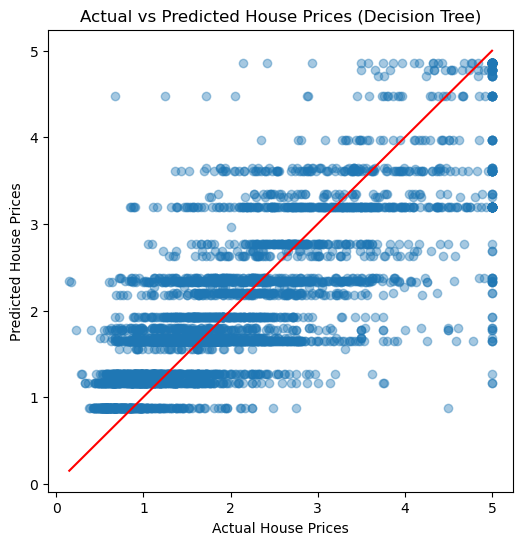

In [10]:
# Re-training the best model for visualization
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title(f"Actual vs Predicted House Prices ({best_model_name})")

# Reference line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")

plt.show()

### Conclusion
Multiple regression models were trained and evaluated for house price prediction.
Based on the evaluation metrics, the model with the lowest RMSE and highest R² score
was selected as the best-performing model. This comparison highlights how different
algorithms perform on the same dataset.